In [34]:
import pandas as pd
import numpy as np
import re
import plotnine as p9
pd.set_option('display.max_row', 300)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [35]:
figuren = {
    "f": ["p", "r", "n", "b", "q", "k", "P", "R", "N", "B", "Q", "K"],
    "gif": [
        "bp1024.gif", "br1024.gif", "bn1024.gif", "bb1024.gif", "bq1024.gif", 
        "bk1024.gif", "wP1024.gif", "wR1024.gif", "wN1024.gif", "wB1024.gif", 
        "wQ1024.gif", "wK1024.gif"
    ]
}

figuren = pd.DataFrame(figuren)

In [36]:

def square_color(s, z):
    return "black" if (s + z) % 2 == 0 else "white"

def fen_to_dataframe(fen):
    board_fen = fen.split()[0]
    board = []
    rows = board_fen.split('/')
    for z, row in enumerate(rows):
        s = 1  
        for char in row:
            if char.isdigit():
                for _ in range(int(char)):
                    color = square_color(s, 8 - z)
                    board.append({'s': s, 'z': 8 - z, 'f': None, 'c': color})
                    s += 1
            else:
                color = square_color(s, 8 - z)
                board.append({'s': s, 'z': 8 - z, 'f': char, 'c': color})
                s += 1
    
    df = pd.DataFrame(board)
    return df

fen = "r1b1k1nr/p2p1pNp/n2B4/1p1NP2P/6P1/3P1Q2/P1P1K3/q5b1"
df = fen_to_dataframe(fen)
df = df.merge(figuren, how='left', on='f')



c:\Users\offic\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_text : Removed 40 rows containing missing values.


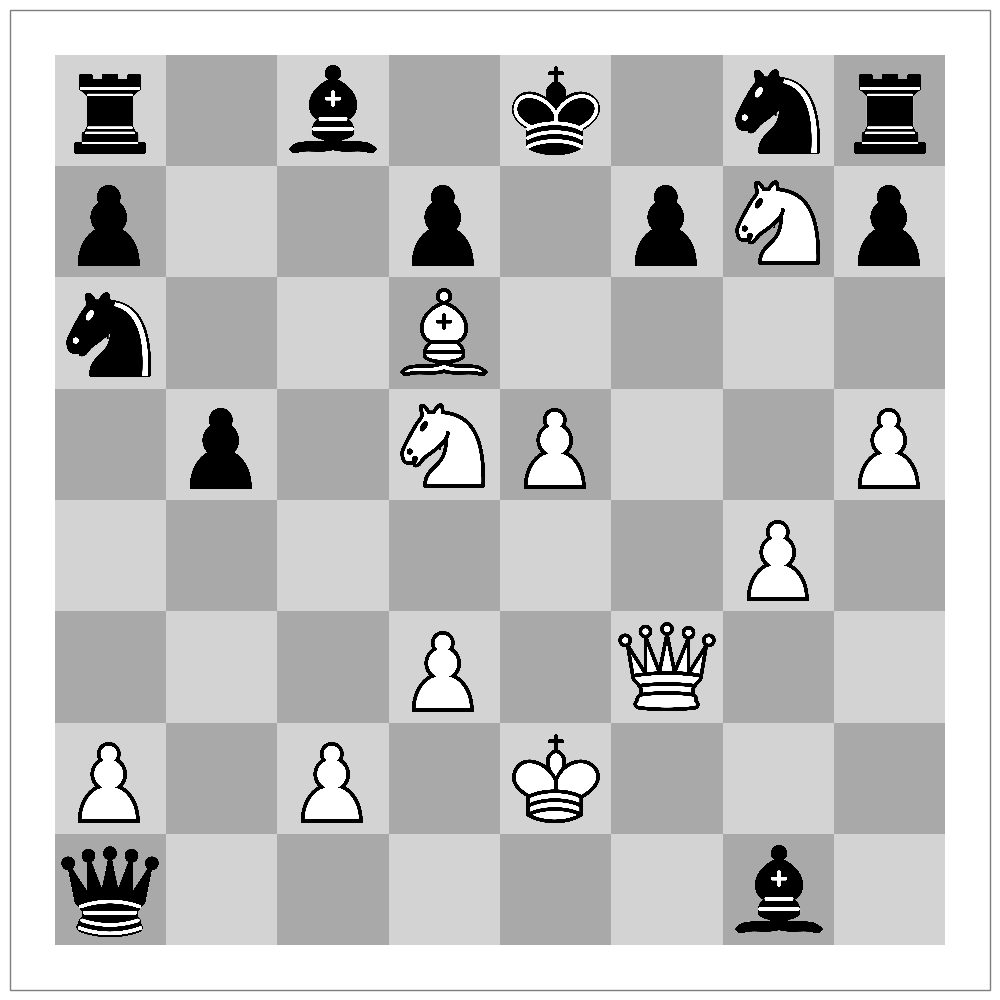

In [37]:

p=(p9.ggplot(df)
 +p9.geom_tile(p9.aes(x='s-.5',y='z-.5', fill='c'))
 +p9.geom_text(p9.aes(x='s-.5',y='z-.5', label='f'), size=15)
 +p9.theme_bw()
 +p9.theme(figure_size=[10,10])
 +p9.coord_fixed()
 +p9.scale_fill_manual(values=['darkgray','lightgray'])
 +p9.theme(axis_line=p9.element_blank())
 +p9.theme(panel_background=p9.element_blank())
 +p9.theme(axis_text=p9.element_blank())
 +p9.theme(axis_ticks=p9.element_blank())
 +p9.theme(panel_grid=p9.element_blank())
 +p9.labs(x='',y='')
 +p9.theme(legend_position='none')
 
 
 )

fig = p.draw()
ax = fig.axes[0]


dff = df.dropna()

for i, row in dff.iterrows():
    img = matplotlib.offsetbox.OffsetImage(
        plt.imread(row['gif']), 
        zoom = 0.08)
    ax.add_artist(matplotlib.offsetbox.AnnotationBbox(img,
        (row['s']-.5 ,row['z']-.5)
        ,pad = 0.0
        ,frameon =False
        )
        )
fig
